<h1>데이터 크롤링</h1>

In [2]:
from bs4 import BeautifulSoup
import requests

url="https://finance.naver.com/"
html=requests.get(url)
soup=BeautifulSoup(html.text,'html.parser')
names=soup.select('#_topItems1 > tr > th > a')
prices=soup.select('#_topItems1 > tr > td')
pricelist=[]
for i in range(0,len(prices),3):
    pricelist.append(int(prices[i].get_text().replace(",","")))
result=dict()
for i,j in zip(names,pricelist):
    result[i.get_text()]=int(j)
result

{'KODEX 200선물인버스2X': 2920,
 'KEC': 2950,
 '이트론': 209,
 '포스코 ICT': 8640,
 '이수페타시스': 10610,
 '이엔플러스': 9520,
 'HB테크놀러지': 2640,
 '삼성 인버스 2X WTI원유 선물 ETN': 150,
 'KODEX 코스닥150선물인버스': 4415,
 'MDS테크': 3395,
 '카나리아바이오': 28650,
 'KODEX 레버리지': 14800,
 '우리이앤엘': 1131,
 '레이크머티리얼즈': 9000,
 '포스코엠텍': 19130}

<h1>Pandas</h1>

In [3]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///Crawling.db', echo=False)
df=pd.DataFrame(result.values(),index=result.keys(),columns=['가격'])
df = df.rename_axis("종목")
df.to_sql(name='종목과_가격', con=engine, if_exists='replace')
df

,가격
종목,
KODEX 200선물인버스2X,2920
KEC,2950
이트론,209
포스코 ICT,8640
이수페타시스,10610
이엔플러스,9520
HB테크놀러지,2640
삼성 인버스 2X WTI원유 선물 ETN,150
KODEX 코스닥150선물인버스,4415


<h1>시각화</h1>

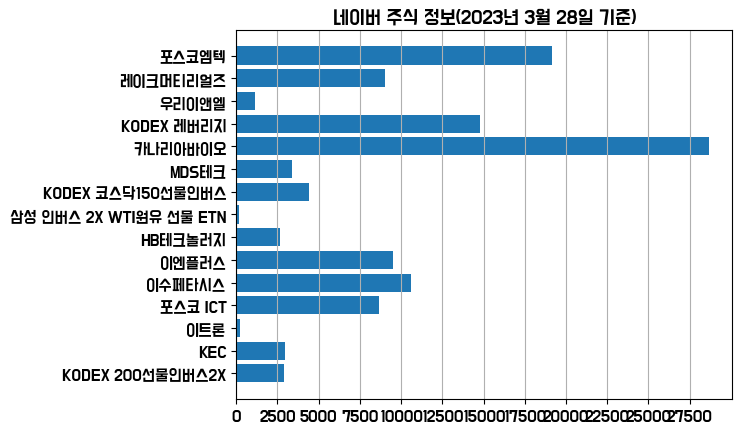

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family']=fm.FontProperties(fname='C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMDOHYEON_ttf.ttf').get_name()
plt.title(F"네이버 주식 정보(2023년 3월 28일 기준)")
plt.barh(df.index, df['가격'])
plt.xticks(range(0,30000,2500))
plt.grid(axis='x')
plt.show()